In [1]:
%load_ext autoreload
%autoreload 2

In [3]:

import os
import json

# Data Wrangling
import h5py
import numpy as np
import pandas as pd

# Plotting
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec


#TODO: RESCALE TRAJECTORY FROM MEANINGFULL UNITS TO NORMALIZATION:
    # OPPOSITE TO 
    # Rescale to meaningfull units: 
    ref_traj[:,0,:],ref_traj[:,1,:],ref_traj[:,2,:] = ref_traj[:,0,:]*5,ref_traj[:,1,:]*5,ref_traj[:,2,:]/2 # Rescaling to make x,y in mm and angle in radian


In [4]:
from classification.template_bouts import generate_template_bouts

In [35]:
templates_flat,templates_labels,NameCat,Duration_after_Downsampling = generate_template_bouts(format='tail',template_duration = 140,target_fps=700,ExludeCaptureSwim=True,delays=[0])

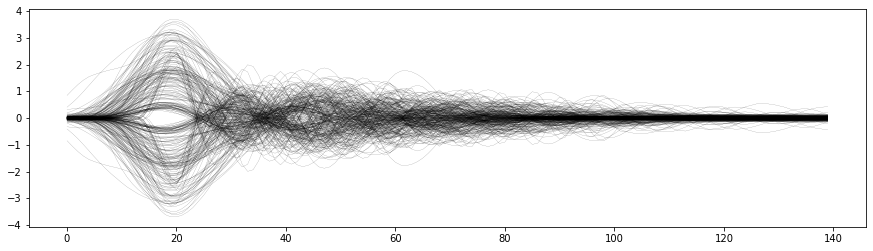

In [36]:
plt.figure(figsize=(15,4))
plt.plot(templates_flat[::100,140*6:].T,'k',lw=0.1)
plt.show()

In [37]:
templates_flat.shape

(30800, 980)

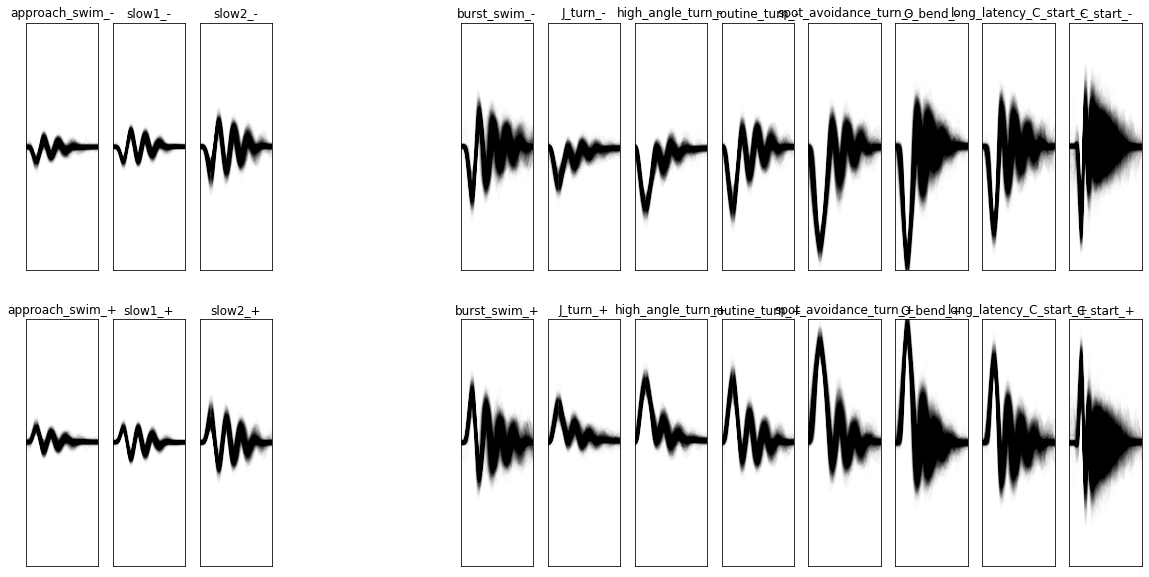

In [38]:
import matplotlib.gridspec as gridspec
from matplotlib import colors

fig, ax = plt.subplots(facecolor='white',figsize=(20,10)) 

G = gridspec.GridSpec(2,13)
ax0 = {}

for k,b in enumerate(np.unique((templates_labels))):
    b = int(b)
    sg = 1 if b<13 else -1
    ax0 = plt.subplot(G[int((sg+1)*1/2),b%13])
    ax0.set_title(NameCat[b])
    
    id = np.where(templates_labels==b)[0]       
    if len(id)>0:
        id = id[0:1000]
        ax0.plot(templates_flat[id,140*6:].T,'k',alpha=0.01)

    ax0.set_xlim(0,120)
    ax0.set_ylim(-3.6,3.6)
    
    ax0.set_xticks([])
    ax0.set_yticks([])
    
plt.show()


# Color code

In [47]:
#dict_color_species = {'Tu':'#f94144','Giant':'#90be6d','Danionella':'#277da1'}
dict_color_bouts = {}
dict_color_bouts[0] = '#82cfff'
dict_color_bouts[1] = '#4589ff'
dict_color_bouts[2] = '#0000c8'
dict_color_bouts[3] = '#5d5d66'
dict_color_bouts[4] = '#000000'
dict_color_bouts[5] = '#fcaf6d'
dict_color_bouts[6] = '#ffb3b8'
dict_color_bouts[7] = '#08bdba'
dict_color_bouts[8] = '#24a148'
dict_color_bouts[9] = '#9b82f3'
dict_color_bouts[10] = '#ee5396'
dict_color_bouts[11] = '#e3bc13'
dict_color_bouts[12] = '#fa4d56'

dict_color_bouts[13] = '#82cfff'
dict_color_bouts[14] = '#4589ff'
dict_color_bouts[15] = '#0000c8'
dict_color_bouts[16] = '#5d5d66'
dict_color_bouts[17] = '#000000'
dict_color_bouts[18] = '#fcaf6d'
dict_color_bouts[19] = '#ffb3b8'
dict_color_bouts[20] = '#08bdba'
dict_color_bouts[21] = '#24a148'
dict_color_bouts[22] = '#9b82f3'
dict_color_bouts[23] = '#ee5396'
dict_color_bouts[24] = '#e3bc13'
dict_color_bouts[25] = '#fa4d56'
#dict_color_species = {'Tu':(249/255., 65/255., 68/255.),'Giant':(144/255., 190/255., 109/255.),'Danionella':(39/255., 125/255., 161/255.)}

In [45]:
list_color_no_CS = ['#82cfff','#4589ff','#0000c8','#fcaf6d','#ffb3b8','#08bdba','#24a148','#9b82f3','#ee5396','#e3bc13','#fa4d56']
list_color_w_CS = ['#82cfff','#4589ff','#0000c8','#5d5d66','#000000','#fcaf6d','#ffb3b8','#08bdba','#24a148','#9b82f3','#ee5396','#e3bc13','#fa4d56']

NameCatSym_w_CS = []

NameCatSym_w_CS=['approach_swim', 'slow1', 'slow2', 'slow_capture_swim','fast_capture_swim', 'burst_swim', 'J_turn', 'high_angle_turn','routine_turn', 'spot_avoidance_turn', 'O_bend','long_latency_C_start', 'C_start']
NameCatSym_no_CS=['approach_swim', 'slow1', 'slow2', 'burst_swim', 'J_turn', 'high_angle_turn','routine_turn', 'spot_avoidance_turn', 'O_bend','long_latency_C_start', 'C_start']

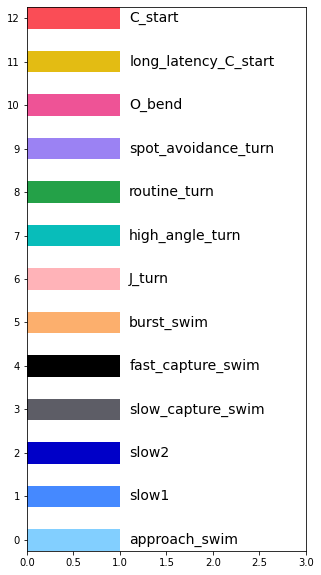

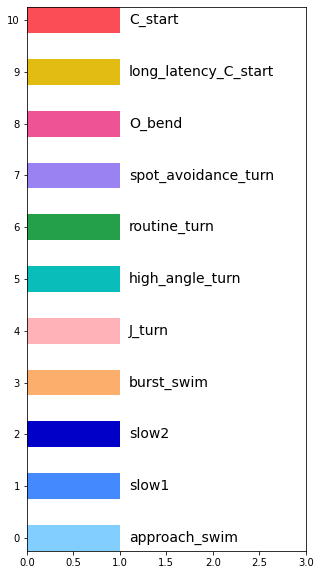

In [46]:
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

fig, ax = plt.subplots(figsize=(5,10))
for i,c in enumerate(list_color_w_CS):
    ax.add_patch(Rectangle(xy=(0,i*2), width=1,
                      height=1, facecolor=c))
    ax.text(1.1, i*2+0.5, NameCatSym_w_CS[i], fontsize=14,
                horizontalalignment='left',
                verticalalignment='center')                     
ax.set_ylim(0,25)
ax.set_xlim(0,3)
ax.set_yticks(np.arange(0,26,2)+0.5)
ax.set_yticklabels(np.arange(13))
plt.show()

from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

fig, ax = plt.subplots(figsize=(5,10))
for i,c in enumerate(list_color_no_CS):
    ax.add_patch(Rectangle(xy=(0,i*2), width=1,
                      height=1, facecolor=c))
    ax.text(1.1, i*2+0.5, NameCatSym_no_CS[i], fontsize=14,
                horizontalalignment='left',
                verticalalignment='center')                     
ax.set_ylim(0,21)
ax.set_xlim(0,3)
ax.set_yticks(np.arange(0,22,2)+0.5)
ax.set_yticklabels(np.arange(11))
plt.show()

# UMAP

In [48]:
import umap
import umap.plot

In [52]:
reducer = umap.UMAP(n_components=2,verbose=True)
embedding = reducer.fit_transform(templates_flat)

UMAP(dens_frac=0.0, dens_lambda=0.0, verbose=True)
Construct fuzzy simplicial set
Fri May 27 12:38:15 2022 Finding Nearest Neighbors
Fri May 27 12:38:15 2022 Building RP forest with 14 trees
Fri May 27 12:38:16 2022 NN descent for 15 iterations
	 1  /  15
	 2  /  15
	 3  /  15
	Stopping threshold met -- exiting after 3 iterations
Fri May 27 12:38:17 2022 Finished Nearest Neighbor Search
Fri May 27 12:38:18 2022 Construct embedding
	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Fri May 27 12:38:32 2022 Finished embedding


<Figure size 1440x1440 with 0 Axes>

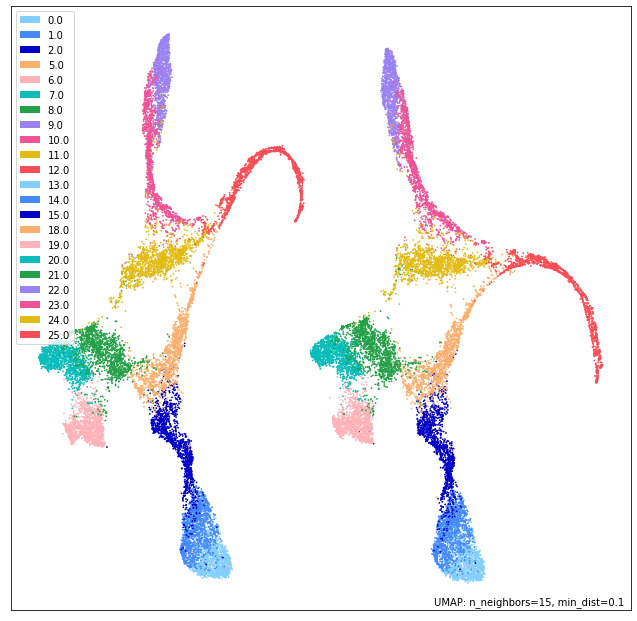

In [53]:
plt.figure(figsize=(20,20))
#umap.plot.points(reducer,labels=bouts_df.strain,color_key_cmap='plasma')
umap.plot.points(reducer,labels=templates_labels,color_key=dict_color_bouts)
plt.draw()